# Simulering Bemanning og Skiftdesign

**2. Simulering av bemanningsbehov og skiftdesign**<br>
<br>
**Formål**: Beregne bemanningsbehovet basert på forventet antall pasienter og skifttider, og sammenligne dette med eksisterende bemanning.<br>
**Hvordan**: Bruk data om pasientankomster og gjennomsnittlig liggetid til å forutsi antall pasienter på avdelingen til ulike tider av døgnet. Deretter sammenligner du dette med nåværende skiftdesign og bemanning for å identifisere under- eller overdekning.<br>
**Resultat**: Avdekke perioder hvor bemanningen er for lav, og evaluere hvordan skiftplanlegging kan optimaliseres.<br>

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Formål**: Simulere bemanningsbehov basert på pasientvolum, skiftplaner og kapasitet.<br>
<br>
**Nødvendig data**:<br>
<br>
1. Antall pasientankomster per time/dag.<br>
2. Skifttider for helsepersonell.<br>
3. Krav til bemanning per pasient (f.eks. antall sykepleiere per pasient).<br>

## Input data

In [7]:
avg_daily_admissions = 2  # Gjennomsnittlig daglige ankomster
avg_length_of_stay = 3  # Gjennomsnittlig liggetid (dager)
patients_per_nurse = 5  # Antall pasienter per sykepleier
total_beds = 26  # Antall senger
shifts_per_day = 3  # Antall skift per dag
shift_hours = 8  # Antall timer per skift
iterations = 1000  # Antall simuleringer

## Simulering underbemannede skift

In [9]:
understaffed_shifts = 0 
staffed_shifts_data = []

for _ in range(iterations):
    try:
        new_admissions = np.random.poisson(avg_daily_admissions) # pasientstrøm
        lengths_of_stay = np.random.exponential(avg_length_of_stay, new_admissions) # lengde pasientopphold
        total_patients = sum([len(lengths_of_stay[lengths_of_stay > day]) for day in range(int(max(lengths_of_stay)))]) # pasienter med daglig pleiebehov (gjennomsnittlig belegg)
        nurses_needed_per_shift = total_patients / patients_per_nurse / shifts_per_day # behov antall sykepleiere per skift
    except:
        nurses_needed_per_shift = 0
    actual_nurses = 11  # Antall sykepleiere per skift (faktisk bemanning)
    if nurses_needed_per_shift > actual_nurses: # tilstrekkelig bemanning?
        understaffed_shifts += 1
    staffed_shifts_data.append(nurses_needed_per_shift)

## Resultater

Prosentandel skift med underbemanning: 0.00%


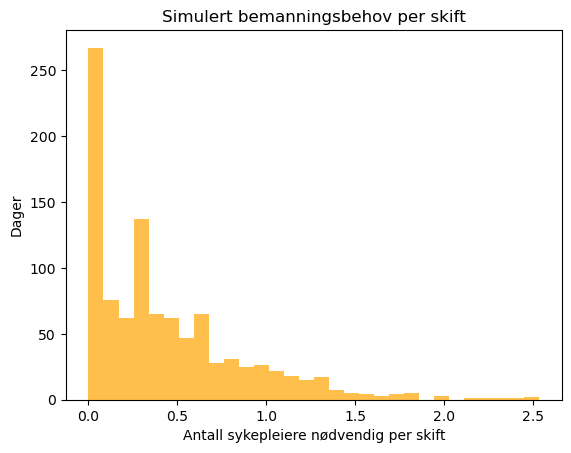

In [10]:
# Resultat: Hvor ofte er skift underbemannet?
print(f"Prosentandel skift med underbemanning: {understaffed_shifts / iterations * 100:.2f}%")

# Visualisering av bemanningsbehov
plt.hist(staffed_shifts_data, bins=30, alpha=0.7, color='orange')
plt.xlabel('Antall sykepleiere nødvendig per skift')
plt.ylabel('Dager')
plt.title('Simulert bemanningsbehov per skift')
plt.show()

**Verdi for sykehuset**:<br>
<br>
1. Forstå hvor ofte avdelingen kan ha for lav bemanning.<br>
2. Planlegge bemanning bedre ved å bruke data om faktiske pasientbehov.<br>